# In Vino Veritas - A wine quality prediction project

## Project Overview
### Goals
The goal with this project is to create a machine learning model to predict the quality of a wine based on it's physicochemical properties. Also it will be to determine key drivers in the wine quality.
This Dataset was acquired through UCI's Machine Learning Repository and can be found [here](https://archive-beta.ics.uci.edu/ml/datasets/186)



### Findings


### Conclusion

### Re Creation

If you wish to recreate this project download the csv files for [red wine](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv) and [white wine](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv) and save them to your repo. More information about this data can be found [here] <---- Insert link here

In [1]:
# import modules
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

# set plot defaults
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['axes.titlesize'] = 15

sns.set_style('darkgrid')
# create module for this to hide color paalette and such

# import modeling tools
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest

# import custom modules
import prepare as p
import explore as ex
import model as m

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
wine_palette = ['#310c2d', '#672547', '#9e5f77', '#ddb49d', '#a96f55', '#929724']
wine_palette2 = ['#8d4271', '#310c2d', '#7c0000', '#8e314a', '#b15b58', '#c4a8ad', '#c1937d','#f2e9da']
wine_contrast = ['#672547', '#929724','#7c0000', '#b15b58', '#f2e9da' ]
wine_diverging = ['#8d4271', '#f2e9da', '#929724' ]

sns.set_palette(wine_contrast)
sns.color_palette(wine_diverging)

[(0.5529411764705883, 0.25882352941176473, 0.44313725490196076),
 (0.9490196078431372, 0.9137254901960784, 0.8549019607843137),
 (0.5725490196078431, 0.592156862745098, 0.1411764705882353)]

In [3]:
# import data from csv
# delimeter is semi colons not commas
red_wines = pd.read_csv('winequality-red.csv', delimiter=';')
white_wines = pd.read_csv('winequality-white.csv', delimiter=';')

In [4]:
# look at red wine df
red_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#1599 entries
red_wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
# look at white wine df
white_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
# 4898 entries
white_wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [8]:
# take a look at the target for white wines
white_wines.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [9]:
# take a look at the target for red wines
red_wines.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

### Takeaways Data Acquisition
- Looks like there are no nulls in the dataset (yay!)
- Both have the same columns and column names
- All types floats or ints

**ToDo**
- concat tables togeher to have one long list
- create column to denote that wine is red or white (is_white boolian)
- create bins for quality and booleans for very good and very bad wine categories
    - 7-9 good
    - 5-6 average
    - 1-4 bad

In [10]:
# all of this has been taken care of in the prepare function
df = p.prepare_wine_df(red_wines, white_wines)
df.shape

(6497, 16)

### Takeaways
- Now have dataframe with 6497 rows and 16 columns

<hr style="border-top: 10px groove #7c0000; margin-top: 1px; margin-bottom: 1px"></hr>

## Explore
- Before performing Train Validate Test split, I'll do some Univariate Exploration to see distribution of variables 
- Then we'll split and continue to explore, looking for relationships between the data

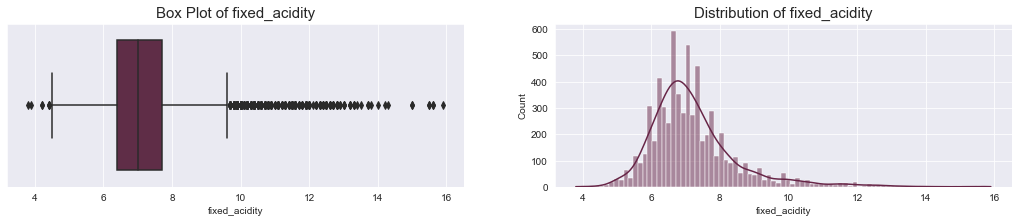

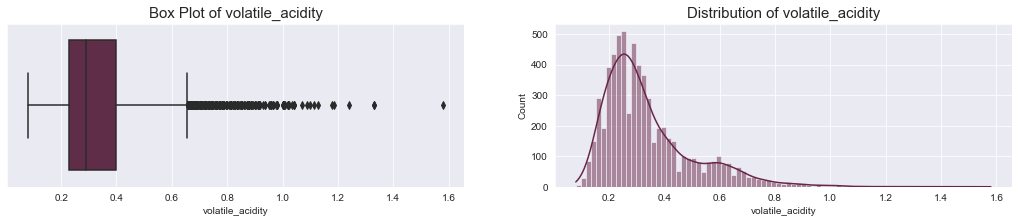

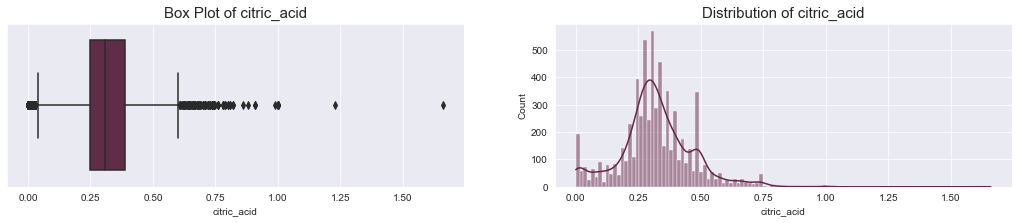

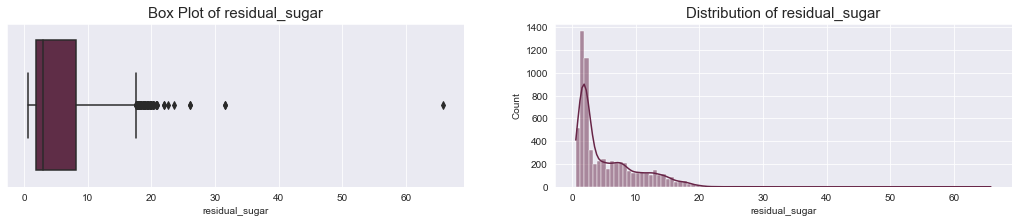

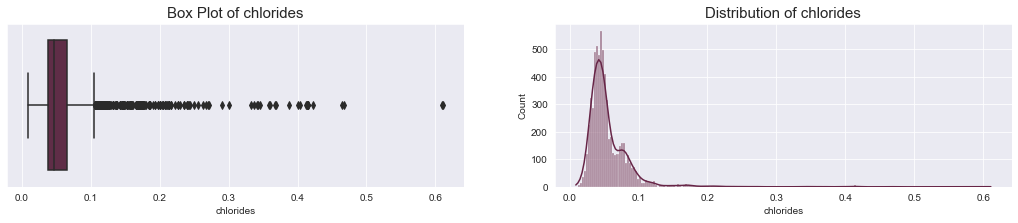

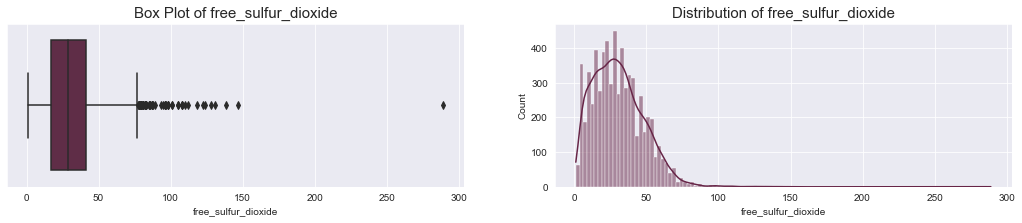

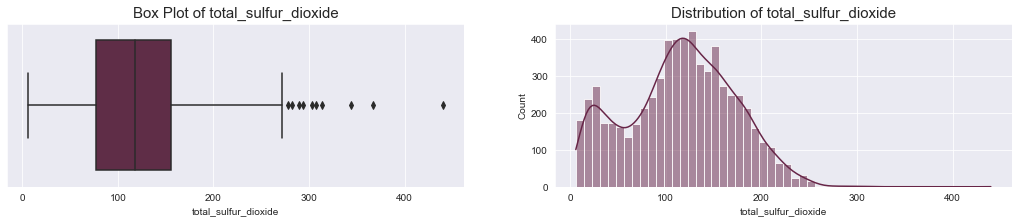

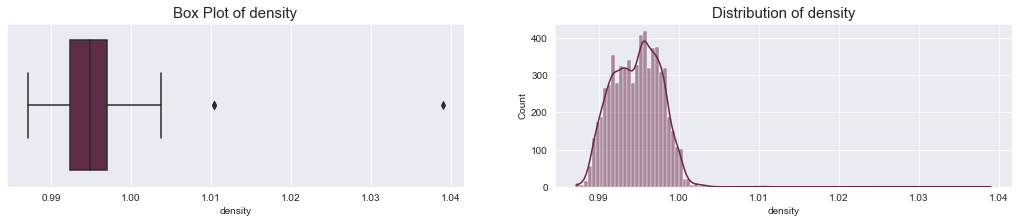

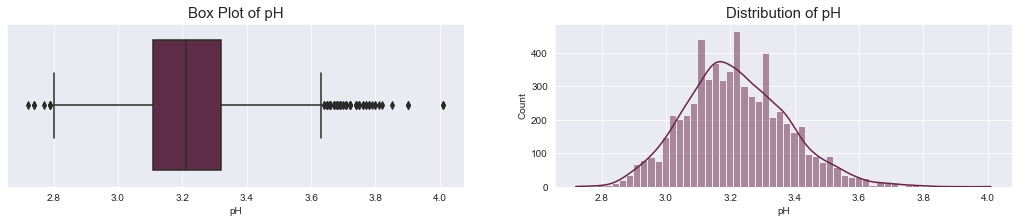

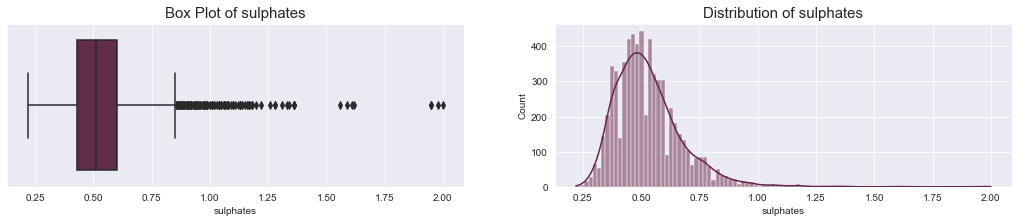

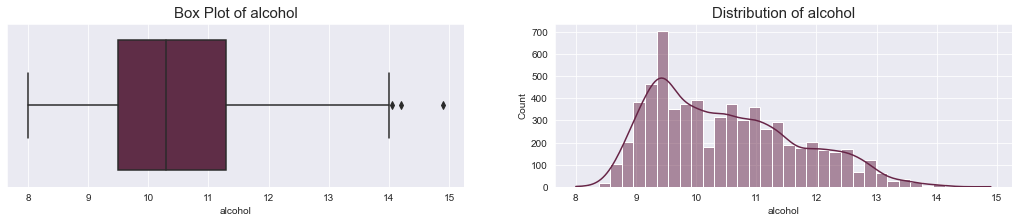

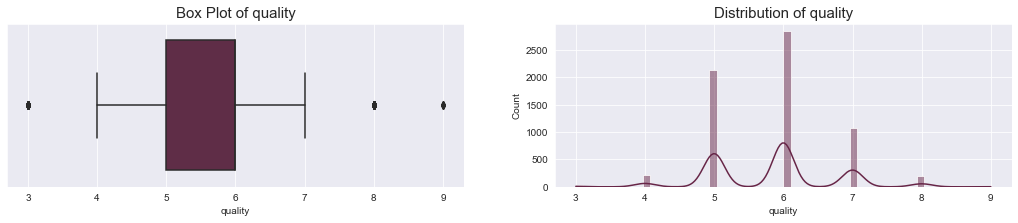

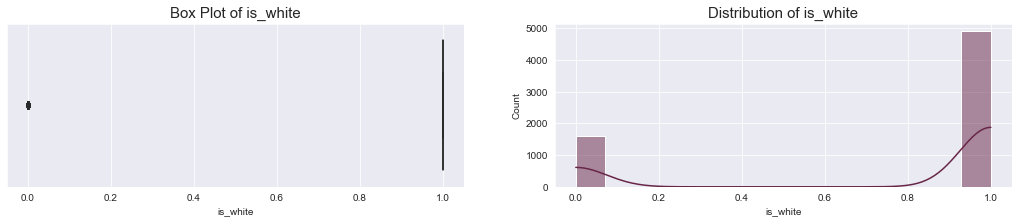

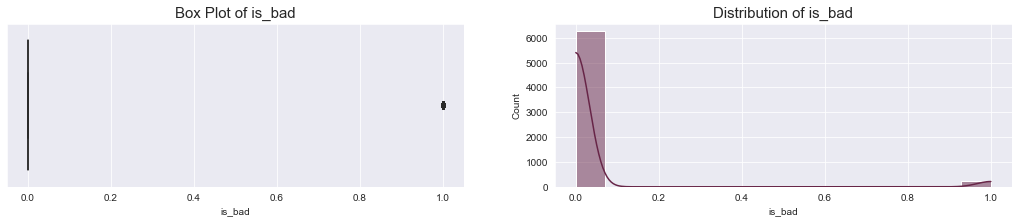

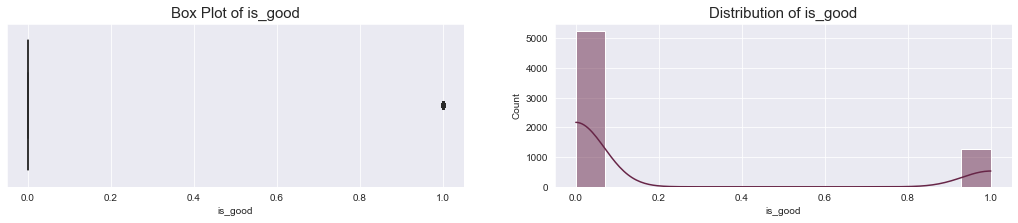

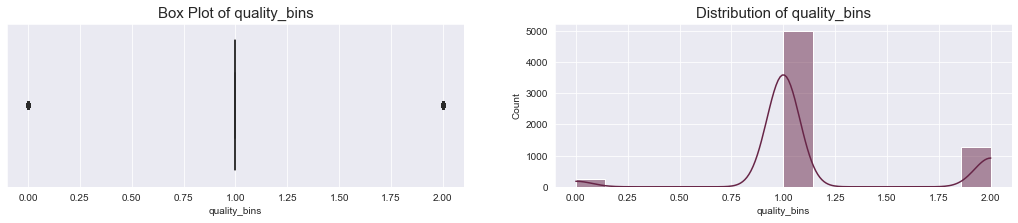

In [11]:
ex.explore_univariate(df)

### Takeaways Univariate Exploration
**Target**
- Looks like our target, `quality`, is mostly normally distributed. This will be good to know for future tests and regression modeling
- Either Multi Class Classification
- Regression for guessing 
- According to Docs wine rating is from 0 - 10
    - There are no wines with a 0 1 or 2 rating, and none with a 10
    - Most wines are in the 5 and 6 range
- Might split into 3 categories (these might not work because 3 and 4 have fewer numbers)
    - bad = 3,4,
    - average = 5,6 
    - best = 7, 8,9
- Idea for 2 categories (for targeting those stand out wines)
    - average = 3 - 6
    - best = 7 - 9

**Variables**
- There are more white wines than red ones (if white and red becomes a huge factor in determining the quality I might not be able to use that feature, or I may need to ensure those are stratified across the train test split
- Most variables are normally distributed ish 
- Alcohol and residual sugar are skewed to the right
    - There are not a lot of wines low in sugar
- There are some outliers but I'll deal with those on a second run through if need be
- Will probably need to do some scaling of the data since they're all in different units of measurements

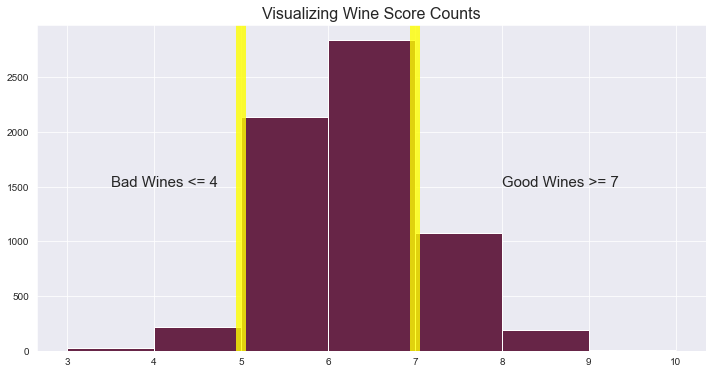

In [12]:
plt.hist(df.quality, bins = (3,4,5,6,7,8,9,10))
plt.title('Visualizing Wine Score Counts', fontsize = 16)
plt.axvline(x = 5, c = 'yellow', lw = 10, alpha = .8)
plt.axvline(x = 7, c = 'yellow', lw = 10, alpha = .8)
plt.annotate('Good Wines >= 7', (8, 1500), fontsize = 15)
plt.annotate('Bad Wines <= 4', (3.5,1500), fontsize = 15)
plt.show()

## Split
- Train Validate Test split Breakdown
    - 80% - 20% Train/Validate and Test split
    - 70% - 30% Train and Validate Split (from the 80 above)


In [13]:
train, validate, test = p.banana_split(df)

train --> (3637, 16)
validate --> (1560, 16)
test --> (1300, 16)


In [14]:
target = 'quality'

targets = ['quality', 'quality_bins', 'is_good', 'is_bad']

variables = list(train.drop(columns = targets))

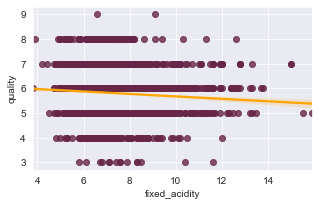

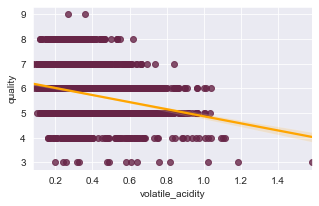

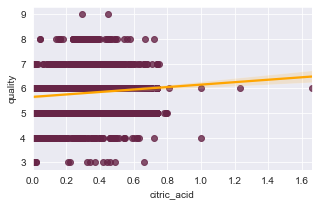

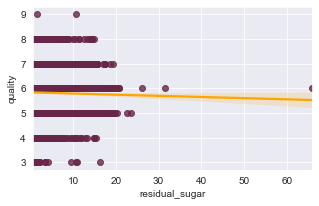

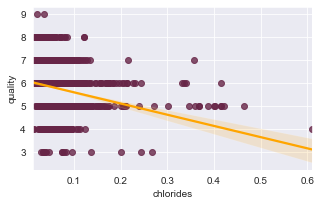

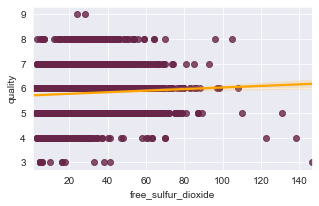

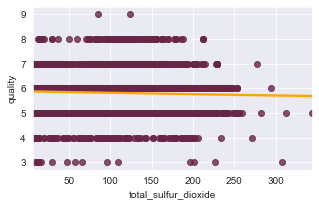

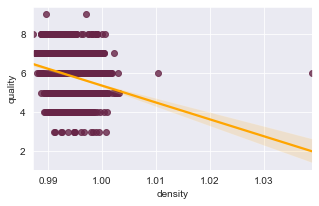

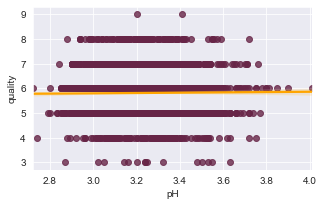

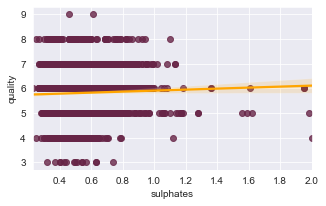

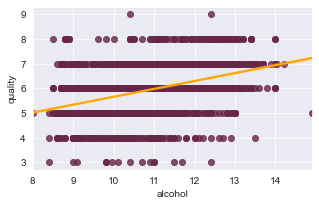

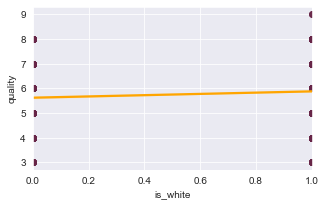

In [15]:
ex.plot_against_target(train, target, variables, figsize=(5,3))

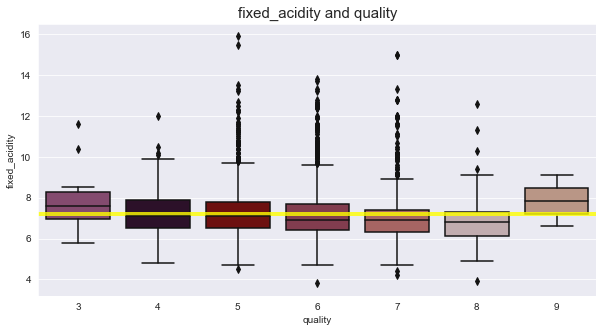

Overall mean for fixed_acidity is: 7.21
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



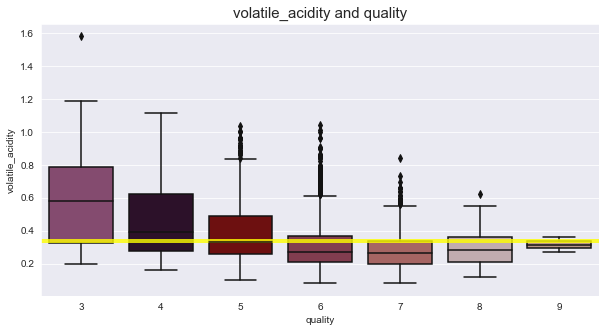

Overall mean for volatile_acidity is: 0.34
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



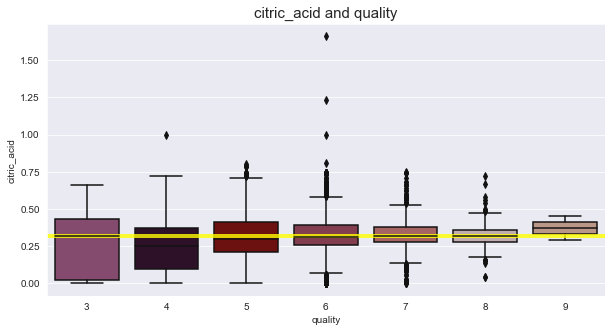

Overall mean for citric_acid is: 0.32
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



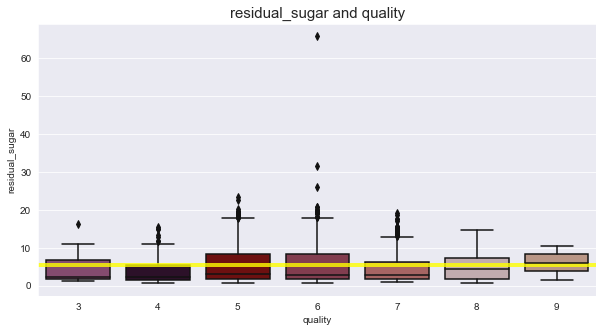

Overall mean for residual_sugar is: 5.39
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



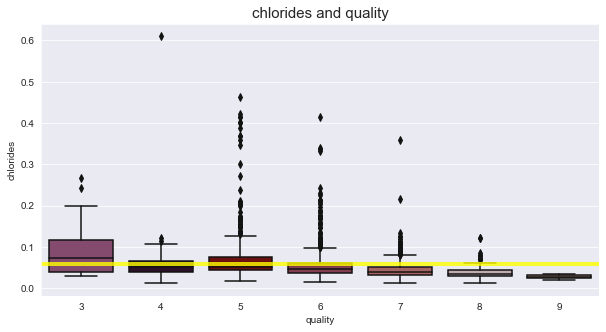

Overall mean for chlorides is: 0.06
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



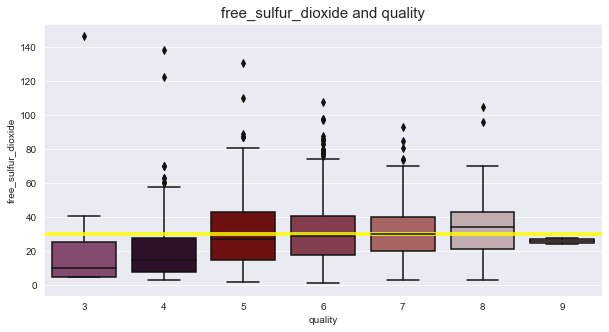

Overall mean for free_sulfur_dioxide is: 30.24
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



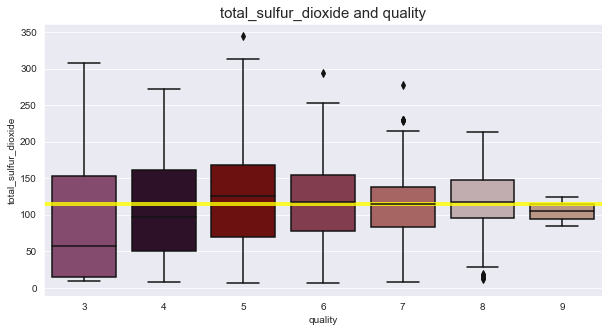

Overall mean for total_sulfur_dioxide is: 115.3
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



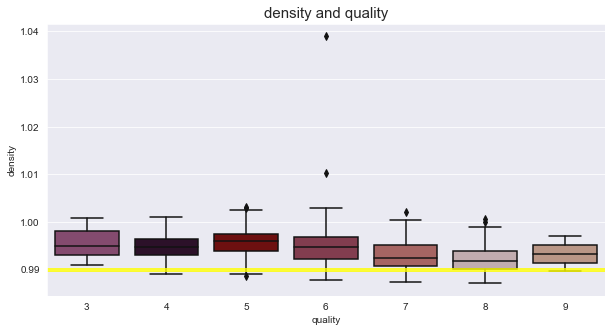

Overall mean for density is: 0.99
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



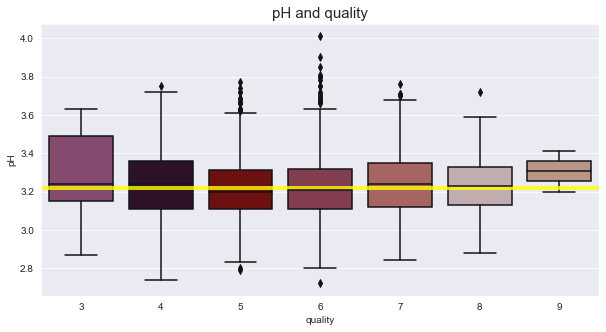

Overall mean for pH is: 3.22
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



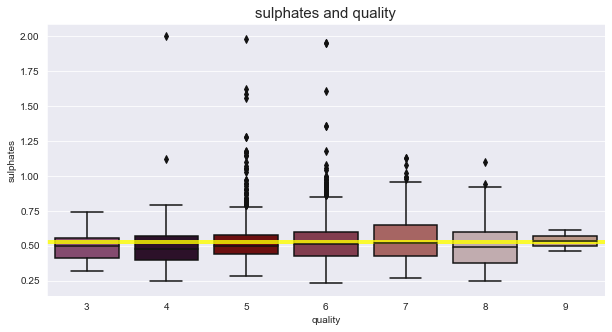

Overall mean for sulphates is: 0.53
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



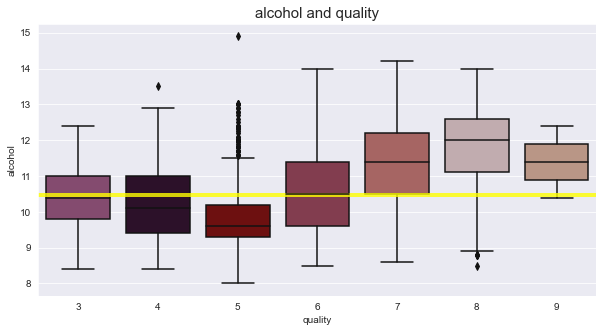

Overall mean for alcohol is: 10.48
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



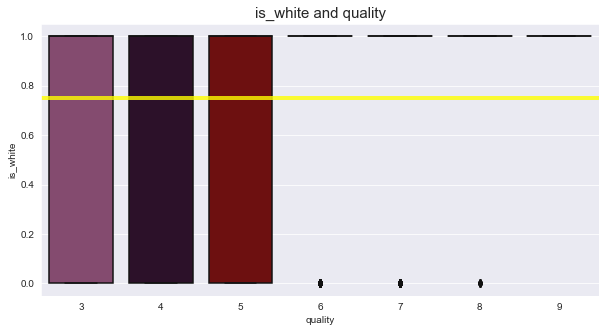

Overall mean for is_white is: 0.75
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



In [16]:
ex.plot_box_against_target(train, target, variables, palette=wine_palette2)

### Takeaways Box Plots
- volatility acidity average for lowest rated wines, is much higher than the average
- Average sulfur dioxide content for lowest rated wines is much lower than the overall mean
- citric acid mean for highest rated wines is higher than overall mean (only category to do so)
- rating 7, 8, and 9 have higher mean for alcohol content is well above the mean for the whole group
- Maybe need to divide into three groups, bad, good, best


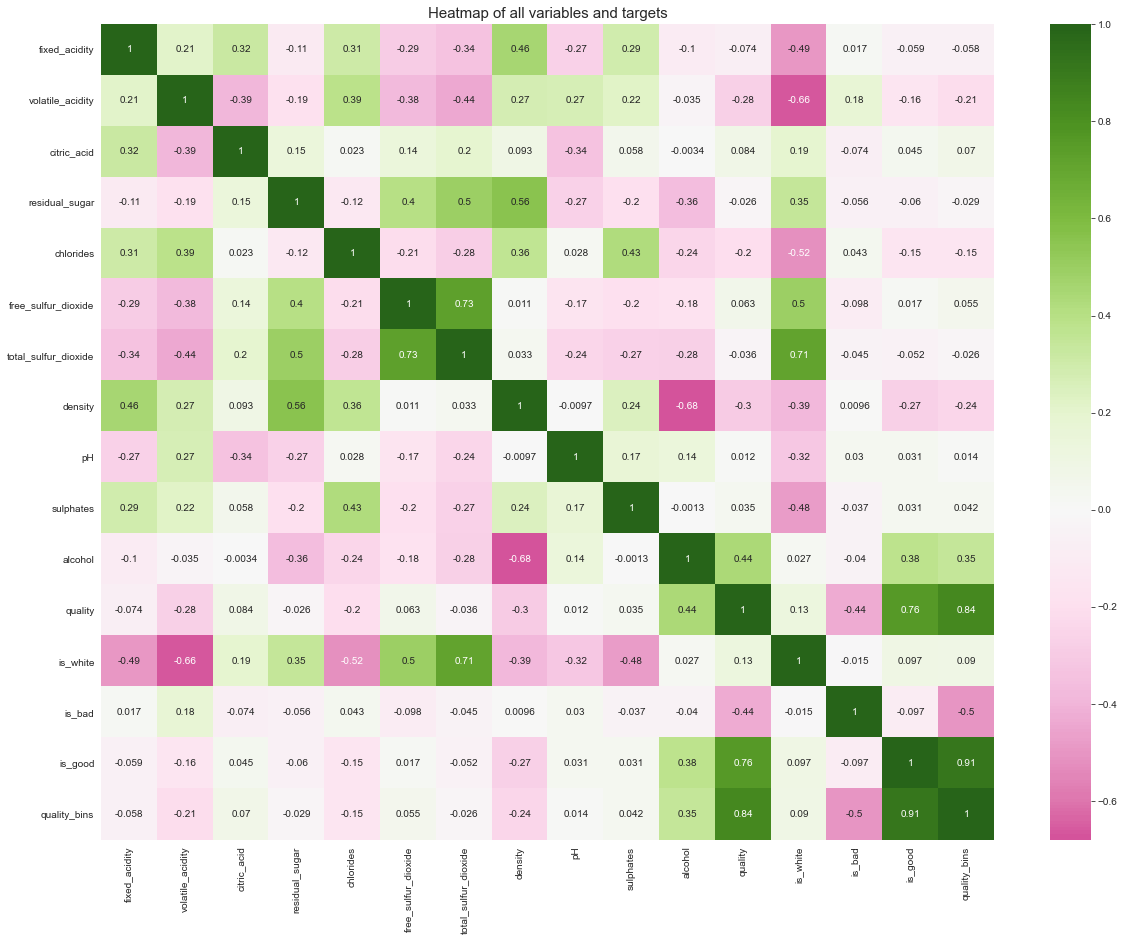

In [17]:
plt.figure(figsize = (20, 15))
sns.heatmap(train.corr(), annot = True, cmap = 'PiYG', center = 0)
plt.title('Heatmap of all variables and targets')
plt.show()

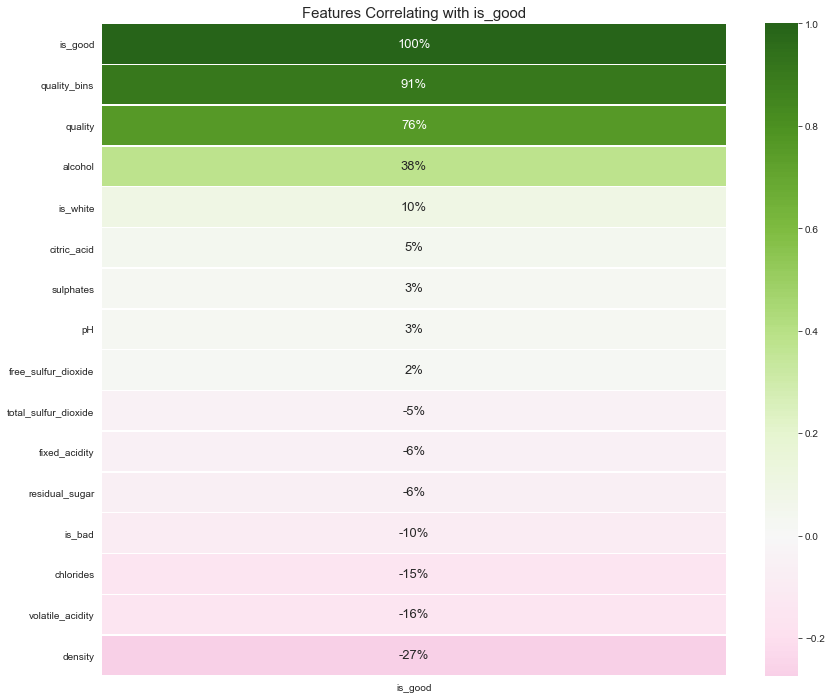

In [18]:
ex.get_heatmap(train, 'is_good')

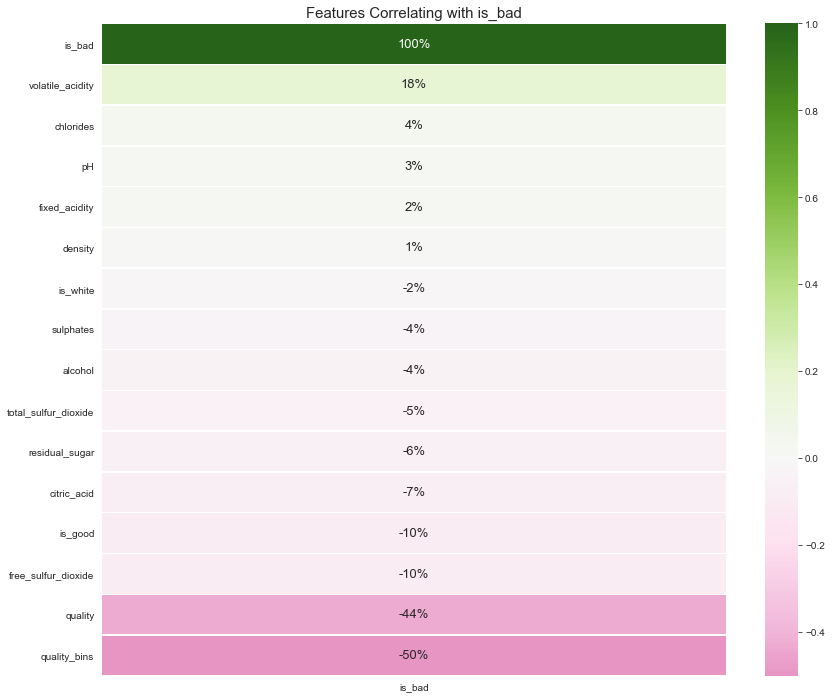

In [19]:
ex.get_heatmap(train, 'is_bad')

<hr style="border-top: 10px groove #7c0000; margin-top: 1px; margin-bottom: 1px"></hr>

## Statistical Testing
- Questions to ask
    - Do alcohol content and wine score have a linear relationship? (continuous vs continuous Pearson R)
    - Similar, is the mean alcohol content for best wines (7-9) higher than the population alcohol content mean (continuous vs categorical one_samp one-tailed, t-test)
    - Does Free Sulfur dioxide level have a linear relationship with quality? (continuous vs continuous Pearson R)
    - Is citric acid level higher in good wines
    - Is citric acid level lower in bad wines
    - Is volatile acidity higher in bad wines

### Is Alcohol Content higher in Good Wines

${H_0}$ Mean alcohol content for good wines (scores 7-9) == to mean alcohol content for all wines

${H_a}$ Mean alcohol content for for all wines > mean alcohol content for all wines

Test: One Sample, one tailed, T-Test 

alpha = 0.05

In [20]:
t, p = stats.ttest_1samp(train[train.is_good == 1].alcohol, train.alcohol.mean())

# divide p by two because 1 tailed
p = p / 2 

In [21]:
ex.eval_ttest_1samp(t, p)

We can reject our null hypothesis
The T is positive so the sample is greater than the population mean


------
### Sulfur Dioxide and Bad Wines

${H_0}$: Free sulfur dioxide level has a linear relationship with wine quality

${H_a}$: Free sulfur dioxide level does not have a linear relationship with wine quality

Test: Pearson R

alpha = 0.05

In [22]:
r, p = stats.pearsonr(train.free_sulfur_dioxide, train.quality)

In [23]:
ex.eval_stats_test(p)

We can reject our null hypothesis


 
${H_0}$: The Mean Free sulfur dioxide level of bad wines == the mean free sulfur dioxide level of all wines

${H_a}$ The Mean Free sulfur dioxide level of bad wines < the mean free sulfur dioxide level of all wines

Test: One Sample, one tailed, T Test

alpha = 0.05

In [24]:
t, p = stats.ttest_1samp(train[train.is_bad ==1].free_sulfur_dioxide, train.free_sulfur_dioxide.mean())

# divide p by 2 because 1 tailed
p = p/2

In [25]:
ex.eval_ttest_1samp(t, p)

We can reject our null hypothesis
The T is negative so the sample is less than the population mean


------- 
### Are Citric Acid Levels higher in Good Wines
${H_0}$: The citric acid level of good wines == the mean citric level of all wines

${H_a}$ The citric level of good wines > the mean citric acid level of all wines

Test: One Sample, one tailed, T Test

alpha = 0.05

In [26]:
t, p = stats.ttest_1samp(train[train.is_good == 1].citric_acid, train.citric_acid.mean())
p = p/2

In [27]:
ex.eval_ttest_1samp(t, p)

We can reject our null hypothesis
The T is positive so the sample is greater than the population mean


------- 
### Are Citric Acid Levels lower in Bad Wines
${H_0}$: The citric acid level of bad wines == the mean citric level of all wines

${H_a}$ The citric level of bad wines < the mean citric acid level of all wines

Test: One Sample, one tailed, T Test

alpha = 0.05

In [28]:
t, p = stats.ttest_1samp(train[train.is_bad == 1].citric_acid, train.citric_acid.mean())
p = p/2

In [29]:
ex.eval_ttest_1samp(t, p)

We can reject our null hypothesis
The T is negative so the sample is less than the population mean


-----
### Is Volatile Acidity higher in Bad Wines

${H_0}$: Mean Volatile Acidity level in bad wines == mean volatile acidity level in all wines

${H_a}$: Mean Volatile Acidity level in bad wines > mean volatile acidity level in all wines

Test: One sample, one tailed, T Test

alpha = 0.05

In [30]:
t, p = stats.ttest_1samp(train[train.is_bad == 1].volatile_acidity, train.volatile_acidity.mean())
p = p/2

In [31]:
ex.eval_ttest_1samp(t, p)

We can reject our null hypothesis
The T is positive so the sample is greater than the population mean


<hr style="border-top: 10px groove #7c0000; margin-top: 1px; margin-bottom: 1px"></hr>

## Modeling

Goals for modeling will be to create models that can accurately predict if a wine is good or bad (using the features already engineered). The target for my model will be `quality_bins`. 0 is bad wines, 1 is average, and 3 is good wines.

#### Why would this be important? 
A wine maker could use this model to predict whether or not his wine will get a good or a bad rating. He simply performs the phisicochemical tests on the wine, runs the data through the model, and could check to see if this batch of wine will be bad, average, or good.

### Modeling Goals
- Establish baseline
- Feature Selection 
- Create Models (Maybe use KNN on second round will need to scale data)
- Choose best Model

### Hurdles
- Data is imbalanced
- Will need to find a way to balance it

### Baseline
- Set to most predicted (I know this is average wines)

In [32]:
train.quality_bins.value_counts().nlargest(1)

1    2796
Name: quality_bins, dtype: int64

In [33]:
# set up predictions df
pred_df = pd.DataFrame(columns=['baseline'], index=train.index)

# set baseline prediction to 1
pred_df['baseline'] = 1

In [34]:
target_names = ['bad_wines', 'avg_wines', 'good_wines']

In [35]:
print(classification_report(train.quality_bins, pred_df.baseline, target_names = target_names))

              precision    recall  f1-score   support

   bad_wines       0.00      0.00      0.00       136
   avg_wines       0.77      1.00      0.87      2796
  good_wines       0.00      0.00      0.00       705

    accuracy                           0.77      3637
   macro avg       0.26      0.33      0.29      3637
weighted avg       0.59      0.77      0.67      3637



In [36]:
var_cols = ['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol', 'is_white']

target = 'quality_bins'

In [37]:
# use 5 best columns
m.select_kbest(train[var_cols], train[target], 5)

['volatile_acidity', 'chlorides', 'free_sulfur_dioxide', 'density', 'alcohol']

In [38]:
X_cols = m.select_kbest(train[var_cols], train[target], 5)

In [39]:
X_train, y_train, X_validate, y_validate, X_test, y_test = m.all_aboard_the_X_train(X_cols, target, train, validate, test)

In [40]:
# Data set is imbalanced. Use SMOTE to balance out dataset and get more of the lower classes
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 123)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [41]:
d_tree = DecisionTreeClassifier()

knn = KNeighborsClassifier()

log = LogisticRegression()

r_forest = RandomForestClassifier()

models = [d_tree, knn, log, r_forest]

In [42]:
for model in models:
    # fit to train dataset
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_validate)
    
    m.print_metrics(model, y_train, train_pred, set_name="Train")
   
    m.print_metrics(model, y_validate, val_pred, set_name='Validate')
    print('---------------------------------------------------------')

DecisionTreeClassifier()
~~~~~Train Scores~~~~~~
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       136
           1       1.00      1.00      1.00      2796
           2       1.00      1.00      1.00       705

    accuracy                           1.00      3637
   macro avg       1.00      1.00      1.00      3637
weighted avg       1.00      1.00      1.00      3637

[[ 136    0    0]
 [   0 2796    0]
 [   0    0  705]]

DecisionTreeClassifier()
~~~~~Validate Scores~~~~~~
              precision    recall  f1-score   support

           0       0.18      0.18      0.18        55
           1       0.86      0.84      0.85      1188
           2       0.56      0.60      0.58       317

    accuracy                           0.77      1560
   macro avg       0.53      0.54      0.53      1560
weighted avg       0.77      0.77      0.77      1560

[[ 10  40   5]
 [ 46 995 147]
 [  1 126 190]]

----------------------------------

### Takeaways Initial modeling
- Random Forest model, while overfit on the training data, had an accuracy score of .82
- Logistic regression model, was the least overfit on the training data, had an accuracy score of .77 on the unseen data
- Will move forward with Random Forest Model

In [44]:
r_forest = RandomForestClassifier()
r_forest.fit(X_train, y_train)
    
test_pred = r_forest.predict(X_test)

m.print_metrics(r_forest, y_test, test_pred, set_name= 'Test')

RandomForestClassifier()
~~~~~Test Scores~~~~~~
              precision    recall  f1-score   support

           0       0.78      0.13      0.22        55
           1       0.84      0.94      0.89       990
           2       0.69      0.52      0.59       255

    accuracy                           0.82      1300
   macro avg       0.77      0.53      0.57      1300
weighted avg       0.81      0.82      0.80      1300

[[  7  48   0]
 [  2 929  59]
 [  0 123 132]]



### Takeaways Test on Random Forest
- Random Forest classifier had an .82 accuracy which beat the baseline of .77
- Precision on each class was fairly good which is better
- Much higher precision than the baseline for each of the classes (baseline was only predicting the average class)

## Conclusion 
The main factors that were taken into account for my model to predict wine quality were

``` 'volatile_acidity', 'chlorides', 'free_sulfur_dioxide', 'density', 'alcohol' ```

Several of these qualities, backed up by some statistical testing concludes that these are important features of a wine to look out for when creating a batch of wine, because they can have an impact on the reception of that wine in the market.

I was able to create a Random Forest model that predicts the future quality of the wine (as bad, average or good) better than the baseline, with an 82% accuracy. This tool can help winemakers get a better idea of the reception of their product before it hits the shelf. 

With more time I would like to refine the model to be better at predicting low rated wines. This way these types of wines can be avoided during the manufacturing process.